# Importing the required Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# READ DATA

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import pandas as pd
Credit_card = pd.read_csv("E:/ETLHIVE/Credit (2).csv")

In [4]:
Credit_card.head(2)

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [5]:
Credit_card.shape

(400, 13)

In [6]:
Credit_card.describe()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [7]:
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


# Drop unwanted columns

In [8]:
Credit_card = Credit_card.drop(labels  = ["Unnamed: 0","ID"],axis = 1)

# Missing data treatment

In [9]:
Credit_card.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [10]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["CT"])
    W = Q[Q.CT > 0].index
    for i in W:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)
            

In [11]:
replacer(Credit_card)

# Exploratory Data Analysis

In [12]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g")
        plt.show()
    
        sb.distplot(df[i],color ="r")
        plt.show()

    
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl",hue=Credit_card.Gender)
        plt.show()

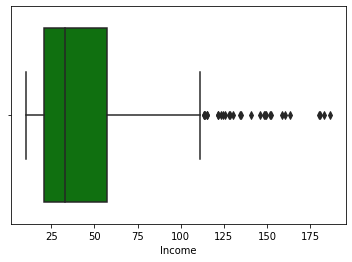

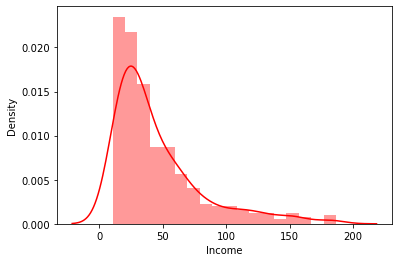

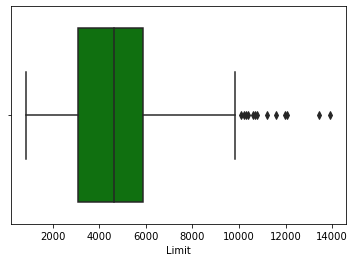

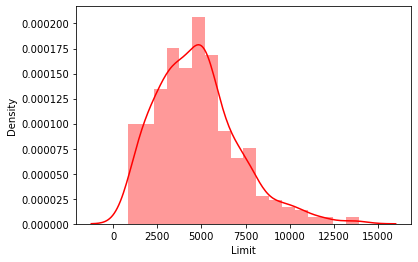

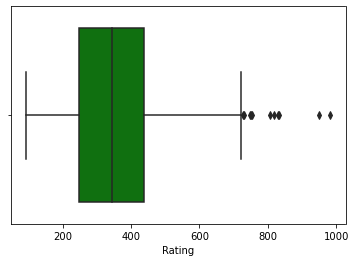

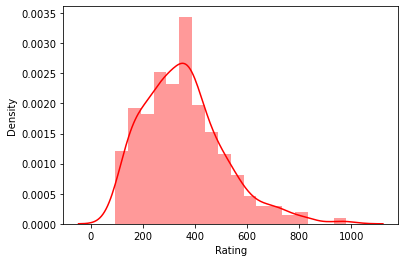

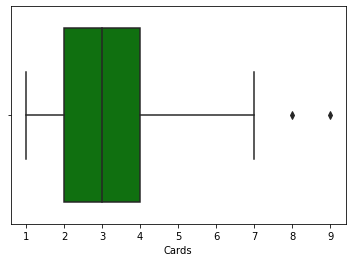

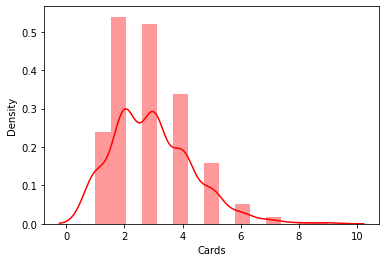

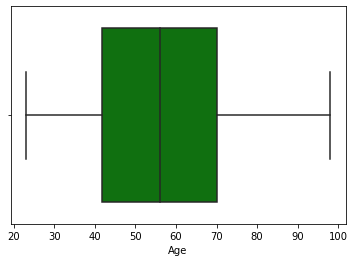

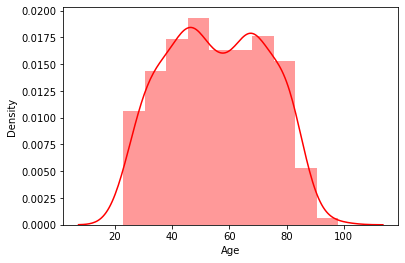

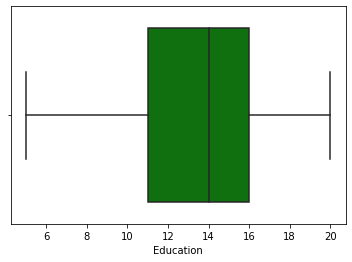

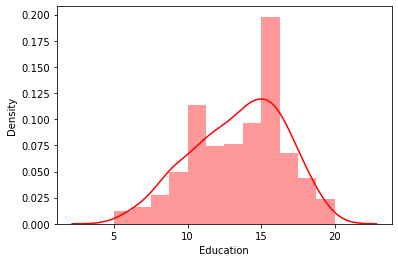

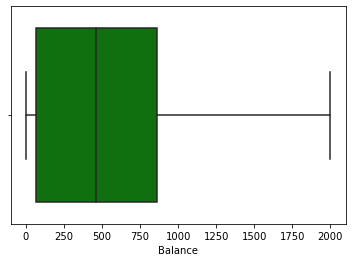

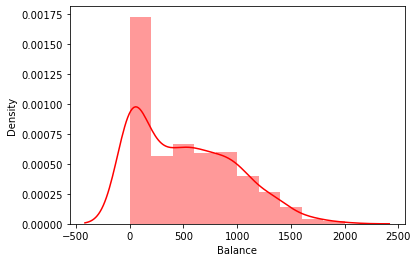

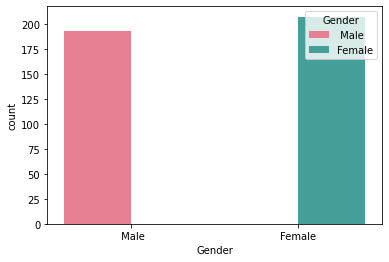

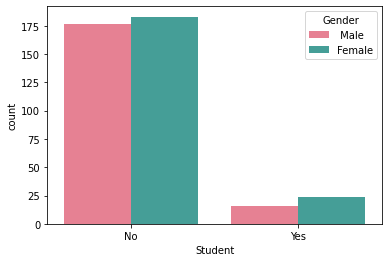

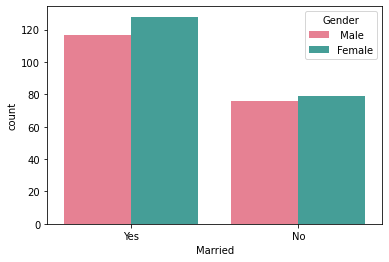

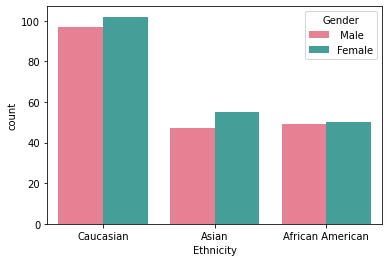

In [13]:
EDA(Credit_card)

# Define X and Y

In [14]:
Y = Credit_card[["Gender"]]
X = Credit_card.drop(labels=["Gender"],axis=1)

# Prepare Y column¶

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = le.fit_transform(Y)

# Preprocessing

In [16]:
def preprocessing(X):
    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
            
    import pandas as pd
    X1 = pd.get_dummies(X[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [17]:
Xnew = preprocessing(X)

# Outliers Treatment

In [18]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

In [19]:
outliers(Xnew)

# Divide Data in training and testing set

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=31)

In [21]:
Xnew.shape

(400, 14)

# Create A NN

In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
nn = Sequential()
nn.add(Dense(100,activation="relu",input_dim=(14)))
nn.add(Dense(100,activation="relu"))
nn.add(Dense(1,activation="sigmoid"))

In [25]:
nn.compile(loss="binary_crossentropy",metrics="accuracy")
nn.fit(xtrain,ytrain,epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 2ms/step - loss: 0.7098 - accuracy: 0.4812
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5656
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5875
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6031
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6094
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.6531
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.6313
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6531
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6719
Epoch 10/500
10/10 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6875
Epoch 11/

In [26]:
nn.get_weights()

[array([[-1.97643057e-01,  2.26407304e-01, -1.45476878e-01, ...,
          1.00512110e-01, -1.90498590e-01,  5.53980410e-01],
        [ 2.32970109e-04, -1.55023128e-01,  8.41891691e-02, ...,
         -2.10187167e-01, -3.30577999e-01,  3.18797439e-01],
        [ 2.49756694e-01,  2.18493551e-01,  1.23236977e-01, ...,
         -1.48451090e-01, -1.74081475e-01,  1.77875325e-01],
        ...,
        [-1.85902312e-01,  4.66098338e-02, -7.09431469e-02, ...,
          2.70264655e-01,  1.03680916e-01, -1.52833730e-01],
        [ 5.27909352e-03,  2.51969248e-01,  7.66095072e-02, ...,
          1.65282011e-01, -4.83044088e-01,  2.32972458e-01],
        [ 2.43479162e-01, -1.66710407e-01, -8.51886049e-02, ...,
         -2.78631896e-01, -7.12386817e-02, -3.83220434e-01]], dtype=float32),
 array([ 0.03375585, -0.03379481,  0.01754769,  0.07507975,  0.03801131,
         0.03344191,  0.02062057, -0.0307571 , -0.02620218, -0.04038243,
         0.00868897,  0.15043999,  0.06611598,  0.00106024, -0.03717

In [27]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1500      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


# Testing

In [28]:
Q = []
for i in nn.predict(xtrain):  # Prediction & compare with ytrain 
    if(i<0.5):
        Q.append(0)
    else:
        Q.append(1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,Q)

1.0

In [30]:
ytrain_1 = le.inverse_transform(ytrain)

In [31]:
ytrain_pred = le.inverse_transform(Q)

In [32]:
ytrain_1 = pd.DataFrame(ytrain_1)

In [33]:
ytrain_pred = pd.DataFrame(ytrain_pred)

In [34]:
ytrain_1 + ytrain_pred

,0
0,Male Male
1,FemaleFemale
2,Male Male
3,FemaleFemale
4,FemaleFemale
...,...
315,FemaleFemale
316,Male Male
317,FemaleFemale
318,FemaleFemale


In [35]:
R = []
for i in nn.predict(xtest):
    if(i<0.5):
        R.append(0)
    else:
        R.append(1)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,R)

0.525

In [37]:
test_pred = pd.DataFrame(le.inverse_transform(R))

In [38]:
test1 = pd.DataFrame(le.inverse_transform(ytest))

In [39]:
(test1 + test_pred)

,0
0,Male Male
1,FemaleFemale
2,MaleFemale
3,FemaleFemale
4,FemaleFemale
...,...
75,Male Male
76,Male Male
77,FemaleFemale
78,Male Male


# Artificial Neural Network used for predict users of credit card are Male or Female 